In [1]:
import genemunge
import json
import matplotlib
import seaborn
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
describer = genemunge.describe.Describer('ensembl_gene_id')
searcher = genemunge.search.Searcher()
hk_genes = searcher.get_housekeeping_genes()

In [3]:
means =  describer.tissue_stats['mean']
robust_stds = (describer.tissue_stats['upper_quartile'] - describer.tissue_stats['lower_quartile']) / 1.35

mean_across_tissues = describer.tissue_stats['mean'].mean(axis=1)
variance_across_tissues = describer.tissue_stats['mean'].var(axis=1)
variance_within_tissues = (describer.tissue_stats['std']**2).mean(axis=1)
total_variance = variance_across_tissues + variance_within_tissues
total_standard_deviation = numpy.sqrt(total_variance)
coefficient_of_variation = total_standard_deviation / mean_across_tissues

/home/drckf/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


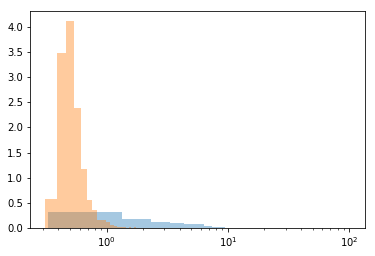

In [4]:
fig, ax = plt.subplots()
seaborn.distplot(coefficient_of_variation.loc[~coefficient_of_variation.index.isin(hk_genes)], ax=ax, kde=False, 
                 bins=100, norm_hist=True)
seaborn.distplot(coefficient_of_variation.loc[hk_genes], ax=ax, kde=False, bins=100, norm_hist=True)
ax.set_xscale('log')

In [10]:
coefficient_of_variation.loc[hk_genes].sort_values()

ENSG00000250021    0.313474
ENSG00000160075    0.320378
ENSG00000157823    0.321818
ENSG00000130724    0.324727
ENSG00000148290    0.325420
ENSG00000067829    0.325967
ENSG00000157916    0.335284
ENSG00000181929    0.336872
ENSG00000107223    0.337637
ENSG00000174903    0.339089
ENSG00000159210    0.339110
ENSG00000108826    0.339368
ENSG00000242485    0.339502
ENSG00000213380    0.339706
ENSG00000101365    0.340495
ENSG00000143612    0.340999
ENSG00000155463    0.342071
ENSG00000167985    0.342110
ENSG00000108788    0.344103
ENSG00000005075    0.344482
ENSG00000103507    0.345481
ENSG00000146007    0.345605
ENSG00000132612    0.345646
ENSG00000105393    0.346258
ENSG00000074319    0.346601
ENSG00000069345    0.347271
ENSG00000133983    0.348110
ENSG00000167792    0.348312
ENSG00000125445    0.348375
ENSG00000149182    0.348715
                     ...   
ENSG00000099901    1.275328
ENSG00000117593    1.319474
ENSG00000163159    1.334373
ENSG00000276380    1.338815
ENSG00000132906    1

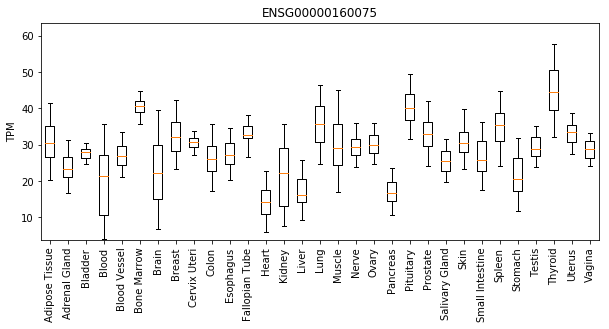

In [13]:
describer.plot_tissue_expression('ENSG00000160075')

In [14]:
describer.get_gene_info('ENSG00000160075')

{'ensembl': 'ENSG00000160075',
 'name': 'SSU72 homolog, RNA polymerase II CTD phosphatase',
 'ontology': {'GO:0005515': 'protein binding',
  'GO:0005654': 'nucleoplasm',
  'GO:0005829': 'cytosol',
  'GO:0005847': 'mRNA cleavage and polyadenylation specificity factor complex',
  'GO:0006369': 'termination of RNA polymerase II transcription',
  'GO:0006378': 'mRNA polyadenylation',
  'GO:0008420': 'CTD phosphatase activity',
  'GO:0070940': 'dephosphorylation of RNA polymerase II C-terminal domain'},
 'symbol': 'SSU72'}